# **Importing Essential Packages**

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
import plotly.express as px

# **Importing Dataset**

In [2]:
dataset_path = "https://raw.githubusercontent.com/nandu-ncs/mace-mcalab-22/main/sem3/datascience/dataset/iris.csv"
df = pd.read_csv(dataset_path)

# **Dataset Summary**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [ ]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [ ]:
df.value_counts("variety")

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

# **Histogram**

Text(0, 0.5, 'Count')

<Figure size 720x504 with 0 Axes>

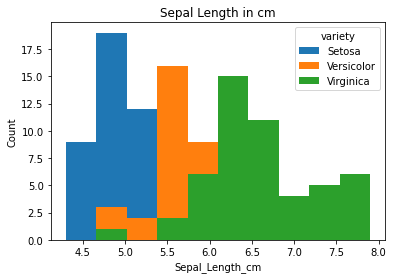

In [ ]:
plt.figure(figsize = (10, 7))
x = pd.DataFrame({"sepallength":df["sepal.length"],"variety":df["variety"]})

x.pivot(columns='variety', values='sepallength').plot.hist()  
plt.title("Sepal Length in cm")
plt.xlabel("Sepal_Length_cm")
plt.ylabel("Count")

# **Quartile (Box) plot**

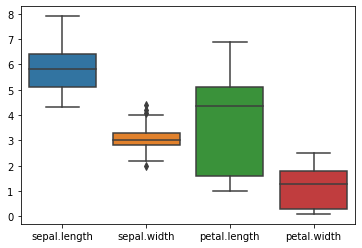

In [ ]:
sns.boxplot(data=df)
plt.show()

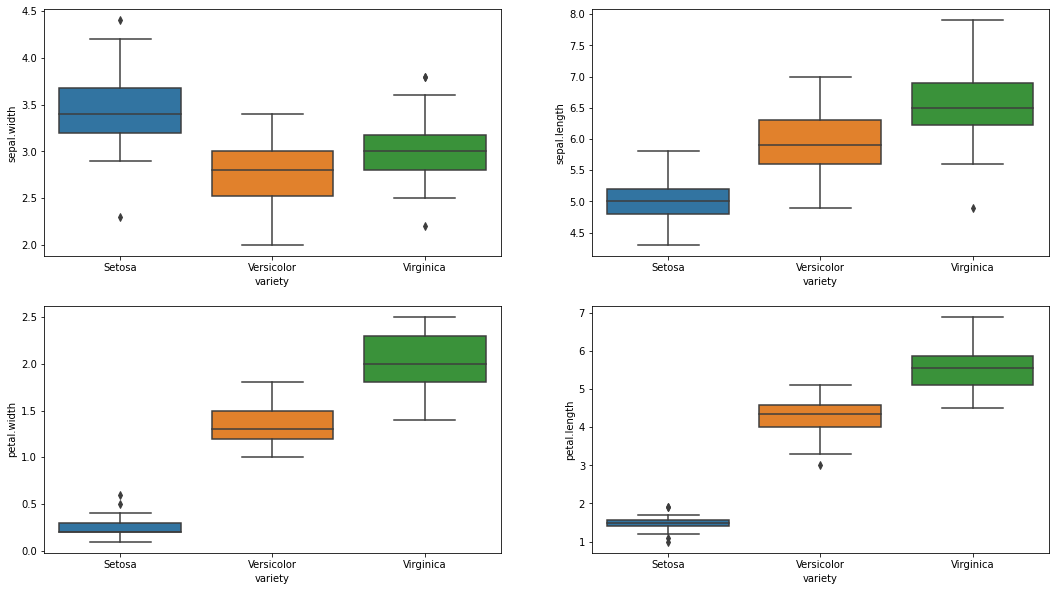

In [ ]:
figure, axis = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(ax=axis[0, 0],x="variety", y="sepal.width", data=df)
sns.boxplot(ax=axis[0, 1],x="variety", y="sepal.length", data=df)
sns.boxplot(ax=axis[1, 0],x="variety", y="petal.width", data=df)
sns.boxplot(ax=axis[1, 1],x="variety", y="petal.length", data=df)


# **Distribution Chart**

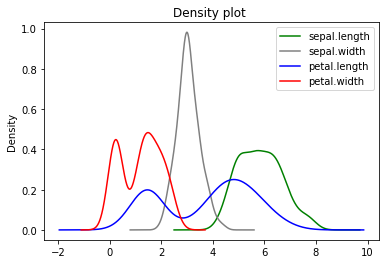

In [ ]:
df.plot.density(color=['green','grey','blue','red'])
plt.title('Density plot ')
plt.show()

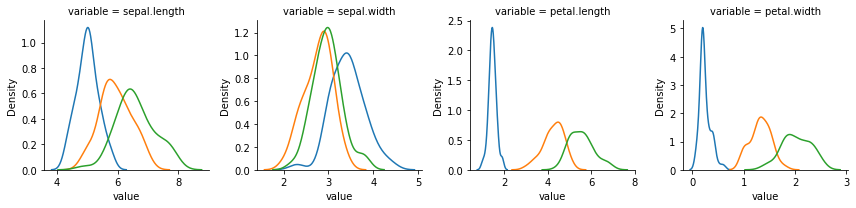

In [ ]:
g = sns.FacetGrid(df.melt(id_vars='variety'),col="variable",sharex=False,sharey=False,hue="variety")
g.map(sns.kdeplot,"value")


# **Scatter Plot**

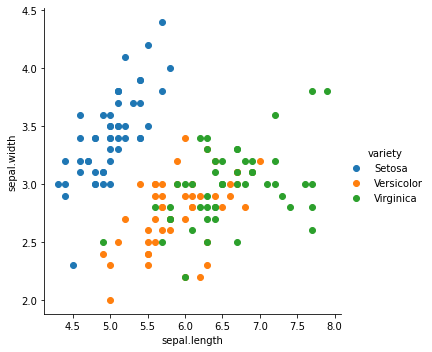

In [ ]:
sns.FacetGrid(df, hue="variety", height=5).map(plt.scatter, "sepal.length", "sepal.width").add_legend()
plt.show()

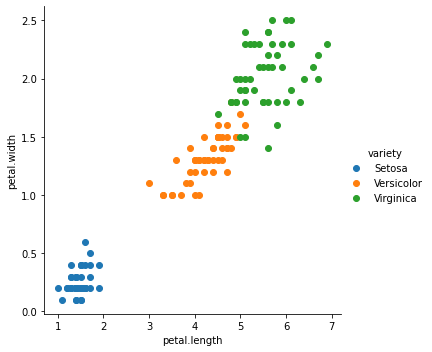

In [ ]:
sns.FacetGrid(df, hue="variety", height=5).map(plt.scatter, "petal.length", "petal.width").add_legend()
plt.show()

From the graph ploted on petal length and width, species are formimg clusters

# **Scatter Multiple**

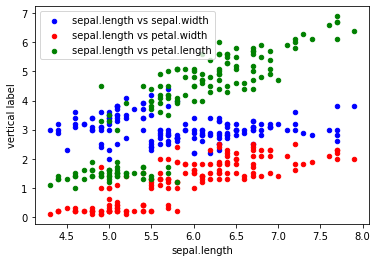

In [ ]:


ax = df.plot(kind="scatter", x="sepal.length",y="sepal.width", color="b", label="sepal.length vs sepal.width")
df.plot(kind="scatter", x="sepal.length",y="petal.width", color="r", label="sepal.length vs petal.width", ax=ax)
df.plot(kind="scatter", x="sepal.length",y="petal.length", color="g", label="sepal.length vs petal.length", ax=ax)

ax.set_xlabel("sepal.length")
ax.set_ylabel("vertical label")
plt.show()

# **Scatter matrix**

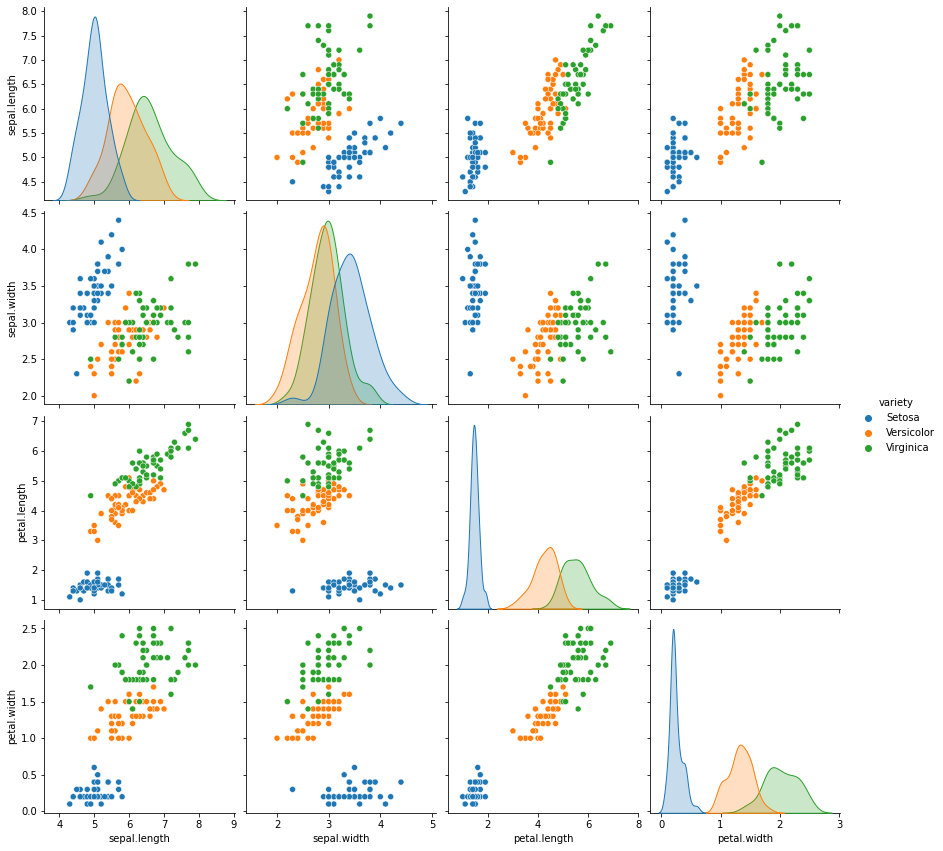

In [3]:
sns.pairplot(df, hue="variety", height=3)
plt.show()

# **Bubble Chart**

In [ ]:
figure = px.scatter(df, x="sepal.width", y="sepal.length", color="variety",size='petal.length')
figure.show()

In [ ]:
figure = px.scatter(df, x="petal.width", y="petal.length", color="variety",size='sepal.length')
figure.show()

# **Density Chart**

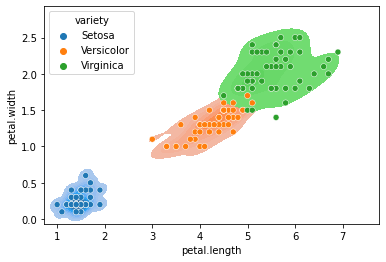

In [23]:

sns.kdeplot(x=df['petal.length'],y=df['petal.width'],shade=True,hue=df["variety"])

sns.scatterplot(x='petal.length', y='petal.width', hue='variety', data=df)

# **Parallel Chart**

In [27]:
df2 = df['variety'].replace(['Setosa', 'Versicolor','Virginica'],[0, 1, 2], inplace=True)
plt=px.parallel_coordinates(df, color="variety", labels={"variety": "variety","sepal.width": "Sepal Width", "sepal.length": "Sepal Length","petal.width": "Petal Width", "petal.length": "Petal Length", },color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
plt.show()

# **Deviation Chart**

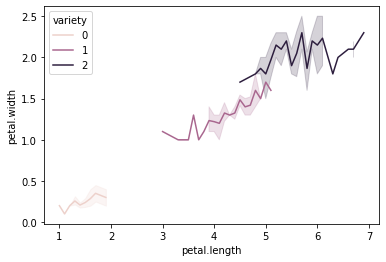

In [32]:
ax = sns.lineplot(x="petal.length",y="petal.width",data=df,hue="variety")

# **Andrews curves**

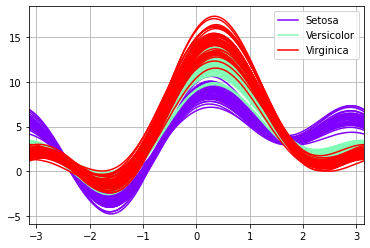

In [ ]:
andrews_curves(df, "variety",colormap='rainbow')
plt.show()